# Task
Investigate methods for obtaining a comprehensive dataset of r/gonewildaudio posts, specifically focusing on identifying potential sources for a CSV database of all posts, as the initial step in a project to analyze male-performed posts and provide recommendations for new creators.

## Using PRAW for Data Acquisition

Since we encountered issues with the Pushshift API, let's try using PRAW (the Python Reddit API Wrapper) to fetch data from r/gonewildaudio.

First, we need to install the `praw` library.

In [24]:
!pip install praw

Now, we'll use PRAW to connect to the Reddit API and fetch posts from r/gonewildaudio. You'll need to provide your Reddit API credentials (client ID, client secret, user agent). You can get these by creating a script app on Reddit's developer portal ([https://www.reddit.com/prefs/apps](https://www.reddit.com/prefs/apps)).

**Important:** It's highly recommended to store your sensitive API credentials securely. In Google Colab, you can use the Secrets tab (🔑 icon on the left sidebar) to store these. Name them `REDDIT_CLIENT_ID`, `REDDIT_CLIENT_SECRET`, and `REDDIT_USER_AGENT`.

In [25]:
import praw
import pandas as pd
import time
from google.colab import userdata

# Get API credentials from Colab Secrets
client_id = userdata.get('REDDIT_CLIENT_ID')
client_secret = userdata.get('REDDIT_CLIENT_SECRET')
user_agent = userdata.get('REDDIT_USER_AGENT') # e.g., 'MyGWAAnalysisScript/1.0 by YourRedditUsername'

# Initialize the Reddit API wrapper
reddit = praw.Reddit(client_id=client_id,
                     client_secret=client_secret,
                     user_agent=user_agent)

# Define the subreddit
subreddit_name = "gonewildaudio"
subreddit = reddit.subreddit(subreddit_name)

# Define the filters for male-performed posts based on your roadmap
filters = ["[M4F]", "[M4M]", "[M4A]", "[M]"]
tag_pattern = r'^(\[M4F\]|\[M4M\]|\[M4A\]|\[M\]|\s\[M4F\]|\s\[M4M\]|\s\[M4A\]|\s\[M\])'

print(f"Fetching up to 3000 top posts from r/{subreddit_name} using PRAW...")

posts = []
limit = 3000

try:
    # Fetch the top posts. PRAW will handle pagination automatically up to the specified limit.
    # We remove the manual loop and 'after' parameter and rely on PRAW's iterator with the limit.
    for submission in subreddit.top(limit=limit, time_filter='all'):
        posts.append(submission)

    print(f"Finished fetching. Total potential posts fetched: {len(posts)}")

except Exception as e:
    print(f"Error fetching posts with PRAW: {e}")


# Process and filter the fetched posts
if posts:
    data = []
    for post in posts:
        # Apply filtering logic based on your roadmap
        # Filter out stickied posts
        if post.stickied:
            continue

        # Further refine filtering based on title using regex
        # Ensure 'title' attribute exists before applying string methods
        if hasattr(post, 'title') and pd.Series(post.title).str.contains(tag_pattern, case=False, na=False).iloc[0]:
             # Select the required columns as per your roadmap
            # Ensure required attributes exist before accessing
            author_name = post.author.name if post.author else None # Handle deleted authors

            data.append({
                'id': getattr(post, 'id', None),
                'title': getattr(post, 'title', None),
                'author': author_name,
                'created_utc': getattr(post, 'created_utc', None),
                'score': getattr(post, 'score', None),
                'upvote_ratio': getattr(post, 'upvote_ratio', None),
                'num_comments': getattr(post, 'num_comments', None),
                'selftext': getattr(post, 'selftext', None),
                'url': getattr(post, 'url', None),
                'stickied': getattr(post, 'stickied', None)
            })

    df_final = pd.DataFrame(data)

    print(f"Filtered down to {len(df_final)} male-performed posts after applying title tag logic and removing stickied posts.")
    display(df_final.head())

else:
    print("No posts fetched or an error occurred.")

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching up to 3000 top posts from r/gonewildaudio using PRAW...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

Finished fetching. Total potential posts fetched: 1000
Filtered down to 291 male-performed posts after applying title tag logic and removing stickied posts.


,id,title,author,created_utc,score,upvote_ratio,num_comments,selftext,url,stickied
0,mislkr,[M4F] Fucked By Your Best Friend's Younger Bro...,AugustInTheWinter,1.617395e+09,19106,1.00,446,*This content is made by and for those who are...,https://www.reddit.com/r/gonewildaudio/comment...,False
1,nonvl2,[M4F] Stop Fucking Calling Me D*ddy [Roommates...,AugustInTheWinter,1.622419e+09,15377,1.00,443,**This content is made by and for those who ar...,https://www.reddit.com/r/gonewildaudio/comment...,False
2,iwhb2k,"[M4F] The Days Are Long, The Days Are Hard [MD...",ProfessorCal_,1.600620e+09,12911,1.00,341,# Repost\n\nHi everyone! The original Days Are...,https://www.reddit.com/r/gonewildaudio/comment...,False
3,kkac1y,[M4F] Ten Points [BFE][Get On Top of Me][And K...,ProfessorCal_,1.608948e+09,12692,0.99,729,Extra tags I didn't include! \~\n\n**\[Multipl...,https://www.reddit.com/r/gonewildaudio/comment...,False
4,qftud6,[M4F] Fucked By Your Secret Ghost Roommate on ...,AugustInTheWinter,1.635206e+09,12110,1.00,308,**This content is made by and for those who ar...,https://www.reddit.com/r/gonewildaudio/comment...,False


In [26]:
df_final.shape

(291, 10)

In [27]:
# Display the column names of the DataFrame
print("Columns in the DataFrame:")
print(df_final.columns)

# Display the shape of the DataFrame (number of rows and columns)
print("\nShape of the DataFrame:")
print(df_final.shape)

# Display the data types of each column
print("\nData types of the columns:")
print(df_final.dtypes)

# Display the first few rows of the DataFrame again to see the data
print("\nFirst 5 rows of the DataFrame:")
display(df_final.head())

Columns in the DataFrame:
Index(['id', 'title', 'author', 'created_utc', 'score', 'upvote_ratio',
       'num_comments', 'selftext', 'url', 'stickied'],
      dtype='object')

Shape of the DataFrame:
(291, 10)

Data types of the columns:
id               object
title            object
author           object
created_utc     float64
score             int64
upvote_ratio    float64
num_comments      int64
selftext         object
url              object
stickied           bool
dtype: object

First 5 rows of the DataFrame:


,id,title,author,created_utc,score,upvote_ratio,num_comments,selftext,url,stickied
0,mislkr,[M4F] Fucked By Your Best Friend's Younger Bro...,AugustInTheWinter,1.617395e+09,19106,1.00,446,*This content is made by and for those who are...,https://www.reddit.com/r/gonewildaudio/comment...,False
1,nonvl2,[M4F] Stop Fucking Calling Me D*ddy [Roommates...,AugustInTheWinter,1.622419e+09,15377,1.00,443,**This content is made by and for those who ar...,https://www.reddit.com/r/gonewildaudio/comment...,False
2,iwhb2k,"[M4F] The Days Are Long, The Days Are Hard [MD...",ProfessorCal_,1.600620e+09,12911,1.00,341,# Repost\n\nHi everyone! The original Days Are...,https://www.reddit.com/r/gonewildaudio/comment...,False
3,kkac1y,[M4F] Ten Points [BFE][Get On Top of Me][And K...,ProfessorCal_,1.608948e+09,12692,0.99,729,Extra tags I didn't include! \~\n\n**\[Multipl...,https://www.reddit.com/r/gonewildaudio/comment...,False
4,qftud6,[M4F] Fucked By Your Secret Ghost Roommate on ...,AugustInTheWinter,1.635206e+09,12110,1.00,308,**This content is made by and for those who ar...,https://www.reddit.com/r/gonewildaudio/comment...,False


## Phase 2: Data Filtering and Cleaning

### Step 2.1: Basic Cleaning

Implementing the basic cleaning steps: converting the `created_utc` timestamp to datetime and extracting time-based features, and calculating the length of the post body and title.

In [28]:
# Ensure df_final exists and is a DataFrame from the previous step
if 'df_final' in locals() and isinstance(df_final, pd.DataFrame):

    # Convert created_utc to a standard datetime format
    # Using errors='coerce' will turn invalid date formats into NaT (Not a Time)
    df_final['created_utc_datetime'] = pd.to_datetime(df_final['created_utc'], unit='s', errors='coerce')

    # Extract useful features from the datetime
    df_final['post_hour'] = df_final['created_utc_datetime'].dt.hour
    df_final['post_day_of_week'] = df_final['created_utc_datetime'].dt.dayofweek # Monday=0, Sunday=6
    df_final['post_month'] = df_final['created_utc_datetime'].dt.month

    # Calculate post_body_length from the selftext column
    # Fill NaN values in 'selftext' with empty strings before calculating length
    df_final['post_body_length'] = df_final['selftext'].fillna('').str.len()

    # Calculate title_length
    # Fill NaN values in 'title' with empty strings before calculating length
    df_final['title_length'] = df_final['title'].fillna('').str.len()

    print("Basic cleaning applied. New columns added:")
    display(df_final[['created_utc_datetime', 'post_hour', 'post_day_of_week', 'post_month', 'post_body_length', 'title_length']].head())

else:
    print("DataFrame 'df_final' not found. Please ensure the previous step for data acquisition and filtering was successful.")

Basic cleaning applied. New columns added:


,created_utc_datetime,post_hour,post_day_of_week,post_month,post_body_length,title_length
0,2021-04-02 20:15:08,20,4,4,2043,266
1,2021-05-31 00:00:23,0,0,5,1462,290
2,2020-09-20 16:45:25,16,6,9,1655,259
3,2020-12-26 01:55:04,1,5,12,947,258
4,2021-10-25 23:58:02,23,0,10,2298,220


In [29]:
df_final

,id,title,author,created_utc,score,upvote_ratio,num_comments,selftext,url,stickied,created_utc_datetime,post_hour,post_day_of_week,post_month,post_body_length,title_length
0,mislkr,[M4F] Fucked By Your Best Friend's Younger Bro...,AugustInTheWinter,1.617395e+09,19106,1.00,446,*This content is made by and for those who are...,https://www.reddit.com/r/gonewildaudio/comment...,False,2021-04-02 20:15:08,20,4,4,2043,266
1,nonvl2,[M4F] Stop Fucking Calling Me D*ddy [Roommates...,AugustInTheWinter,1.622419e+09,15377,1.00,443,**This content is made by and for those who ar...,https://www.reddit.com/r/gonewildaudio/comment...,False,2021-05-31 00:00:23,0,0,5,1462,290
2,iwhb2k,"[M4F] The Days Are Long, The Days Are Hard [MD...",ProfessorCal_,1.600620e+09,12911,1.00,341,# Repost\n\nHi everyone! The original Days Are...,https://www.reddit.com/r/gonewildaudio/comment...,False,2020-09-20 16:45:25,16,6,9,1655,259
3,kkac1y,[M4F] Ten Points [BFE][Get On Top of Me][And K...,ProfessorCal_,1.608948e+09,12692,0.99,729,Extra tags I didn't include! \~\n\n**\[Multipl...,https://www.reddit.com/r/gonewildaudio/comment...,False,2020-12-26 01:55:04,1,5,12,947,258
4,qftud6,[M4F] Fucked By Your Secret Ghost Roommate on ...,AugustInTheWinter,1.635206e+09,12110,1.00,308,**This content is made by and for those who ar...,https://www.reddit.com/r/gonewildaudio/comment...,False,2021-10-25 23:58:02,23,0,10,2298,220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,11mbrkg,[M4F] Helping hand [Script Fill] [Mdom] [Brat]...,Rum_N-Coke,1.678318e+09,2502,0.98,35,You have such a crush on your best friend's ol...,https://www.reddit.com/r/gonewildaudio/comment...,False,2023-03-08 23:24:00,23,2,3,1660,295
287,1ka4xoj,[M4F] Fucked Hard By An Obsessed Big Cock [Yan...,fortifiedmotivation,1.745870e+09,2498,0.98,84,**Extra tags: \[Friends to lovers\] \[Cowgirl\...,https://www.reddit.com/r/gonewildaudio/comment...,False,2025-04-28 19:56:51,19,0,4,568,297
288,xwf9mv,[M4F] This is the part where you run. [mdom] [...,AntiquaVA,1.664987e+09,2500,0.98,95,hey y'all.\n\n**SUMMARY:**\n\n>You finally got...,https://www.reddit.com/r/gonewildaudio/comment...,False,2022-10-05 16:30:50,16,2,10,1038,273
289,vi978y,[M4F] Feral Fap [Stroker toy][wet sounds][Litt...,EyesofSuggestion,1.655915e+09,2504,0.99,130,Hemlo! I am back with this months audio! Sorry...,https://www.reddit.com/r/gonewildaudio/comment...,False,2022-06-22 16:27:52,16,2,6,484,192


### Step 2.2: Tag Extraction & Normalization

Starting with the tag extraction from the 'title' column.

In [30]:
import re

# Ensure df_final exists and has a 'title' column
if 'df_final' in locals() and isinstance(df_final, pd.DataFrame) and 'title' in df_final.columns:

    # Extract all text within square brackets from the 'title' column
    # Apply fillna('') to handle potential NaN values in 'title' before applying regex
    df_final['tags_raw'] = df_final['title'].fillna('').apply(lambda x: re.findall(r'\[(.*?)\]', x))

    print("Raw tags extracted from the 'title' column into 'tags_raw'.")
    # Display the original title and the extracted raw tags for verification
    display(df_final[['title', 'tags_raw']].head())

else:
    print("DataFrame 'df_final' not found or does not have a 'title' column. Please ensure previous steps were successful.")

Raw tags extracted from the 'title' column into 'tags_raw'.


,title,tags_raw
0,[M4F] Fucked By Your Best Friend's Younger Bro...,"[M4F, Soft Mdom, Quiet, Cheeky Guy, Banter, Pu..."
1,[M4F] Stop Fucking Calling Me D*ddy [Roommates...,"[M4F, Roommates to Lovers, Secret Mdom, I Hate..."
2,"[M4F] The Days Are Long, The Days Are Hard [MD...","[M4F, MDom, Frustration, Taking It Out On You,..."
3,[M4F] Ten Points [BFE][Get On Top of Me][And K...,"[M4F, BFE, Get On Top of Me, And Kiss Me Slow,..."
4,[M4F] Fucked By Your Secret Ghost Roommate on ...,"[M4F, Ghost Guy, Mdom, College, Sweet But Roug..."


### Step 2.2: Tag Extraction & Normalization (Continued)

Implementing the rule-based normalization for the extracted tags.

In [31]:
import re

# Ensure df_final exists and has a 'tags_raw' column
if 'df_final' in locals() and isinstance(df_final, pd.DataFrame) and 'tags_raw' in df_final.columns:

    # Define the rule-based normalization function
    def normalize_tag(tag):
        # 1. Convert to lowercase
        normalized_tag = tag.lower()
        # 2. Remove punctuation and spaces (keep letters and numbers)
        normalized_tag = re.sub(r'[^a-z0-9]', '', normalized_tag)
        return normalized_tag

    # Apply the normalization function to each tag in the 'tags_raw' list
    # This will create a list of normalized tags for each post
    df_final['tags_normalized_raw'] = df_final['tags_raw'].apply(lambda tag_list: [normalize_tag(tag) for tag in tag_list])

    print("Raw tags have been normalized (lowercase, no punctuation/spaces) into 'tags_normalized_raw'.")
    # Display the original raw tags and the new normalized raw tags for comparison
    display(df_final[['tags_raw', 'tags_normalized_raw']].head())

    # --- Next part: Synonym Standardization ---
    # This requires a manually created dictionary.
    # Initially, we'll create an empty one. You will build this as you explore the data.
    synonym_mapping = {
        # Example: 'kissing', 'kisses', 'lotsofkisses' all map to 'kissing'
        # 'kissing': 'kissing',
        # 'kisses': 'kissing',
        # 'lotsofkisses': 'kissing',
        # Example: 'ddlg', 'daddy dom' all map to 'ddlg'
        # 'daddydom': 'ddlg', # Note: normalized form 'daddydom' maps to 'ddlg'
        # 'ddlg': 'ddlg'
        # Add more mappings as you discover synonyms in the data
    }

    # Function to standardize tags using the synonym mapping
    def standardize_tag(normalized_tag, mapping):
        # Return the standardized tag from the mapping, or the normalized tag itself if not in mapping
        return mapping.get(normalized_tag, normalized_tag)

    # Apply the standardization function to the list of normalized tags
    df_final['tags_standardized'] = df_final['tags_normalized_raw'].apply(lambda normalized_tag_list: [standardize_tag(tag, synonym_mapping) for tag in normalized_tag_list])

    print("\nTags standardized using the current synonym mapping into 'tags_standardized'.")
    print("Note: The synonym mapping is currently empty and needs to be built based on data exploration.")
    # Display the normalized raw tags and the new standardized tags for comparison
    display(df_final[['tags_normalized_raw', 'tags_standardized']].head())


else:
    print("DataFrame 'df_final' not found or does not have a 'tags_raw' column. Please ensure previous steps were successful.")

Raw tags have been normalized (lowercase, no punctuation/spaces) into 'tags_normalized_raw'.


,tags_raw,tags_normalized_raw
0,"[M4F, Soft Mdom, Quiet, Cheeky Guy, Banter, Pu...","[m4f, softmdom, quietcheekyguy, banter, pussye..."
1,"[M4F, Roommates to Lovers, Secret Mdom, I Hate...","[m4f, roommatestolovers, secretmdom, ihatethat..."
2,"[M4F, MDom, Frustration, Taking It Out On You,...","[m4f, mdom, frustration, takingitoutonyou, tea..."
3,"[M4F, BFE, Get On Top of Me, And Kiss Me Slow,...","[m4f, bfe, getontopofme, andkissmeslow, putemi..."
4,"[M4F, Ghost Guy, Mdom, College, Sweet But Roug...","[m4f, ghostguy, mdom, college, sweetbutrough, ..."



Tags standardized using the current synonym mapping into 'tags_standardized'.
Note: The synonym mapping is currently empty and needs to be built based on data exploration.


,tags_normalized_raw,tags_standardized
0,"[m4f, softmdom, quietcheekyguy, banter, pussye...","[m4f, softmdom, quietcheekyguy, banter, pussye..."
1,"[m4f, roommatestolovers, secretmdom, ihatethat...","[m4f, roommatestolovers, secretmdom, ihatethat..."
2,"[m4f, mdom, frustration, takingitoutonyou, tea...","[m4f, mdom, frustration, takingitoutonyou, tea..."
3,"[m4f, bfe, getontopofme, andkissmeslow, putemi...","[m4f, bfe, getontopofme, andkissmeslow, putemi..."
4,"[m4f, ghostguy, mdom, college, sweetbutrough, ...","[m4f, ghostguy, mdom, college, sweetbutrough, ..."


How should we go about to further classify and analyze **tags standardized**?

In [32]:
# Ensure df_final exists and has a 'tags_standardized' column
if 'df_final' in locals() and isinstance(df_final, pd.DataFrame) and 'tags_standardized' in df_final.columns:

    # Flatten the list of lists in the 'tags_standardized' column into a single list of all tags
    all_standardized_tags = [tag for tags_list in df_final['tags_standardized'] for tag in tags_list]

    # Get the unique tags using a set
    distinct_tags = set(all_standardized_tags)

    # Count the number of distinct tags
    num_distinct_tags = len(distinct_tags)

    print(f"Total number of distinct standardized tags across all posts: {num_distinct_tags}")

else:
    print("DataFrame 'df_final' not found or does not have a 'tags_standardized' column. Please ensure previous steps were successful.")

Total number of distinct standardized tags across all posts: 1807


Yikes! That's a lot.

Visualizing engagement metrics:


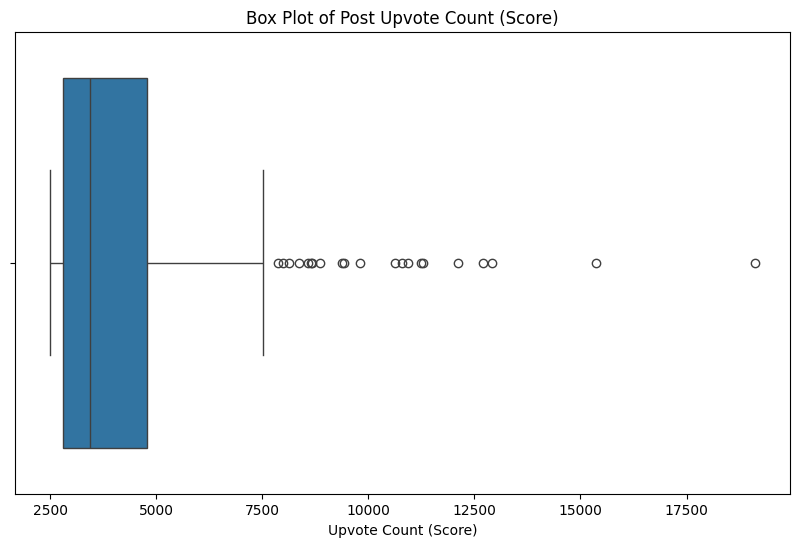

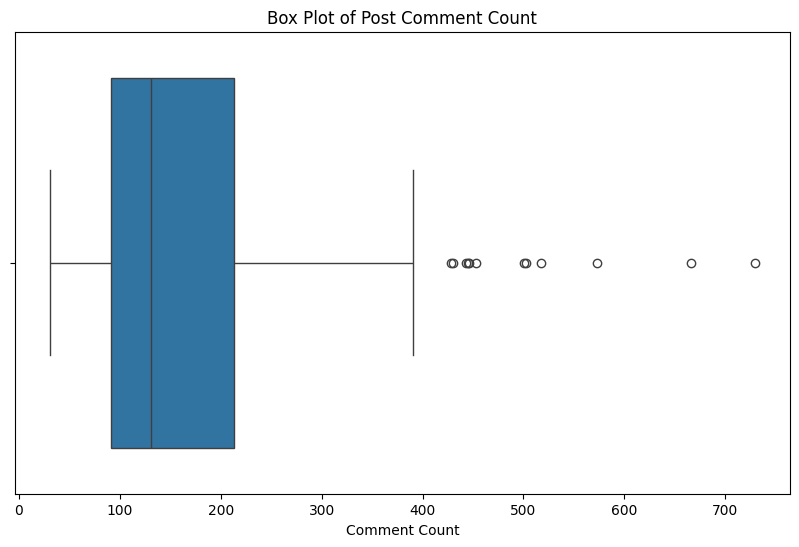

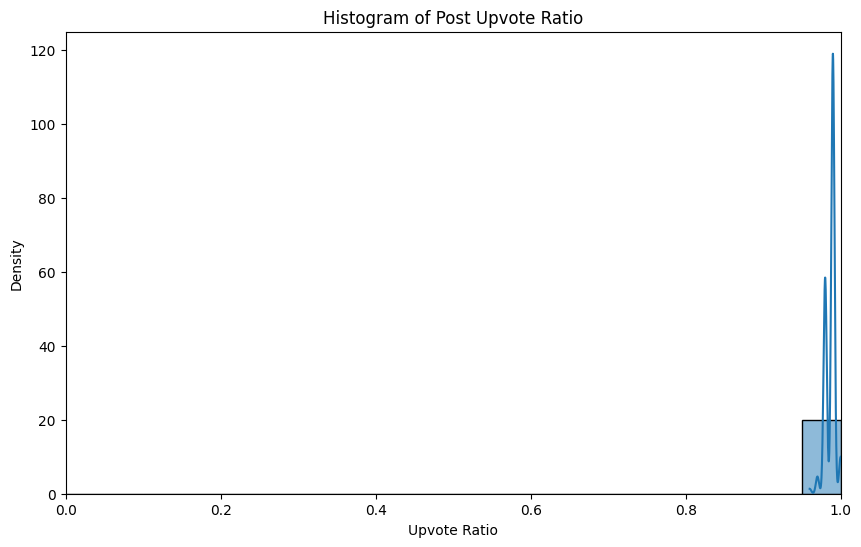

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure df_final exists and has the required columns
if 'df_final' in locals() and isinstance(df_final, pd.DataFrame) and all(col in df_final.columns for col in ['score', 'num_comments', 'upvote_ratio']):

    print("Visualizing engagement metrics:")

    # Box plot for Upvote Count ('score')
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_final['score'])
    plt.title('Box Plot of Post Upvote Count (Score)')
    plt.xlabel('Upvote Count (Score)')
    plt.show()

    # Box plot for Comment Count ('num_comments')
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_final['num_comments'])
    plt.title('Box Plot of Post Comment Count')
    plt.xlabel('Comment Count')
    plt.show()

    # Histogram for Upvote Ratio ('upvote_ratio')
    plt.figure(figsize=(10, 6))
    # Ensure upvote_ratio is between 0 and 1, though PRAW usually provides this correctly
    sns.histplot(df_final['upvote_ratio'], bins=20, kde=True, stat='density', common_norm=False, binrange=(0, 1))
    plt.title('Histogram of Post Upvote Ratio')
    plt.xlabel('Upvote Ratio')
    plt.ylabel('Density')
    plt.xlim(0, 1) # Set x-axis limits from 0 to 1
    plt.show()

else:
    print("DataFrame 'df_final' not found or missing required columns ('score', 'num_comments', 'upvote_ratio'). Please ensure previous steps were successful.")

This looks like a dataset of quite sucessful posts. I doubt that we need to filer further.
We will now try to use K-Means to group and simplify standardized tags.

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Ensure df_final exists and has a 'tags_standardized' column
if 'df_final' in locals() and isinstance(df_final, pd.DataFrame) and 'tags_standardized' in df_final.columns:

    # Convert the list of tags into a single string per post for TF-IDF
    # TfidfVectorizer expects a list of strings, where each string is a document.
    # In our case, each document is the collection of standardized tags for a post.
    df_final['tags_standardized_str'] = df_final['tags_standardized'].apply(lambda tags_list: ' '.join(tags_list))

    # Initialize TfidfVectorizer
    # We use an identity tokenizer because our 'tags_standardized_str' is already space-separated tokens
    # lowercase=False because we already lowercased in a previous step
    tfidf_vectorizer = TfidfVectorizer(tokenizer=lambda x: x.split(), lowercase=False)

    # Fit and transform the tag strings into a TF-IDF matrix
    tfidf_matrix = tfidf_vectorizer.fit_transform(df_final['tags_standardized_str'])

    print("TF-IDF matrix created.")
    print(f"Shape of TF-IDF matrix: {tfidf_matrix.shape}")

else:
    print("DataFrame 'df_final' not found or does not have a 'tags_standardized' column. Please ensure previous steps were successful.")

TF-IDF matrix created.
Shape of TF-IDF matrix: (291, 1806)


/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [35]:
from sklearn.cluster import KMeans
import pandas as pd

# Ensure tfidf_matrix and df_final exist
if 'tfidf_matrix' in locals() and 'df_final' in locals() and isinstance(df_final, pd.DataFrame):

    # Initialize KMeans
    # You will likely need to tune the 'n_clusters' parameter.
    # The optimal number of clusters can be explored using methods like the elbow method.
    n_clusters = 10  # Starting with 10 clusters as an example - adjust as needed

    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10) # n_init='auto' in newer versions, 10 for older

    # Fit KMeans to the TF-IDF matrix and predict cluster labels
    df_final['tag_cluster_label_kmeans'] = kmeans.fit_predict(tfidf_matrix)

    print(f"K-Means clustering applied with n_clusters={n_clusters}.")
    print("Cluster labels assigned to 'tag_cluster_label_kmeans' column.")

    # Display the number of posts in each cluster
    print("\nNumber of posts per cluster (K-Means):")
    display(df_final['tag_cluster_label_kmeans'].value_counts().sort_index())

    # Display head with new cluster labels
    display(df_final[['title', 'tags_standardized', 'tag_cluster_label_kmeans']].head())

else:
    print("TF-IDF matrix ('tfidf_matrix') or DataFrame ('df_final') not found. Please ensure previous steps were successful.")

K-Means clustering applied with n_clusters=10.
Cluster labels assigned to 'tag_cluster_label_kmeans' column.

Number of posts per cluster (K-Means):


,count
tag_cluster_label_kmeans,
0,21
1,42
2,37
3,16
4,26
5,16
6,61
7,39
8,12


,title,tags_standardized,tag_cluster_label_kmeans
0,[M4F] Fucked By Your Best Friend's Younger Bro...,"[m4f, softmdom, quietcheekyguy, banter, pussye...",0
1,[M4F] Stop Fucking Calling Me D*ddy [Roommates...,"[m4f, roommatestolovers, secretmdom, ihatethat...",2
2,"[M4F] The Days Are Long, The Days Are Hard [MD...","[m4f, mdom, frustration, takingitoutonyou, tea...",2
3,[M4F] Ten Points [BFE][Get On Top of Me][And K...,"[m4f, bfe, getontopofme, andkissmeslow, putemi...",1
4,[M4F] Fucked By Your Secret Ghost Roommate on ...,"[m4f, ghostguy, mdom, college, sweetbutrough, ...",1


In [36]:
from collections import Counter
import pandas as pd

# Ensure df_final exists and has 'tags_standardized' and 'tag_cluster_label_kmeans' columns
if 'df_final' in locals() and isinstance(df_final, pd.DataFrame) and all(col in df_final.columns for col in ['tags_standardized', 'tag_cluster_label_kmeans']):

    # Group by the K-Means cluster label
    grouped_by_cluster = df_final.groupby('tag_cluster_label_kmeans')

    print("Most characteristic tags for each K-Means cluster:")

    # Iterate through each cluster
    for cluster_label, cluster_data in grouped_by_cluster:
        # Flatten the list of lists of tags for the current cluster
        all_tags_in_cluster = [tag for tags_list in cluster_data['tags_standardized'] for tag in tags_list]

        # Count the frequency of each tag in the cluster
        tag_counts = Counter(all_tags_in_cluster)

        # Get the most common tags for this cluster (e.g., top 10)
        top_n = 10 # You can adjust this number
        most_common_tags = tag_counts.most_common(top_n)

        print(f"\n--- Cluster {cluster_label} (Number of posts: {len(cluster_data)}) ---")
        if most_common_tags:
            for tag, count in most_common_tags:
                print(f"- {tag} ({count})")
        else:
            print("No tags in this cluster.")

else:
    print("DataFrame 'df_final' not found or missing required columns ('tags_standardized', 'tag_cluster_label_kmeans'). Please ensure previous steps were successful.")

Most characteristic tags for each K-Means cluster:

--- Cluster 0 (Number of posts: 21) ---
- m4f (21)
- fingering (11)
- spanking (7)
- hairpulling (7)
- blowjob (7)
- praise (7)
- doggy (6)
- friendstolovers (6)
- titplay (6)
- missionary (6)

--- Cluster 1 (Number of posts: 42) ---
- m4f (42)
- creampie (25)
- missionary (23)
- mdom (20)
- cunnilingus (16)
- goodgirl (15)
- bfe (14)
- praise (12)
- blowjob (12)
- doggystyle (11)

--- Cluster 2 (Number of posts: 37) ---
- m4f (36)
- fingering (20)
- creampie (18)
- degradation (15)
- mdom (15)
- teasing (14)
- facefucking (13)
- scriptfill (11)
- aftercare (10)
- blowjob (9)

--- Cluster 3 (Number of posts: 16) ---
- m4f (16)
- mdom (8)
- creampie (8)
- degradation (5)
- overstimulation (4)
- spanking (4)
- softmdom (3)
- praise (3)
- roommates (3)
- sfx (2)

--- Cluster 4 (Number of posts: 26) ---
- m4f (26)
- creampie (17)
- mdom (10)
- blowjob (9)
- rape (9)
- cnc (7)
- missionary (7)
- facedownassup (6)
- bitch (6)
- aftercare (5

Generating bar chart for distribution of posts across clusters...


/tmp/ipython-input-1583371061.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette=colors_for_plot)


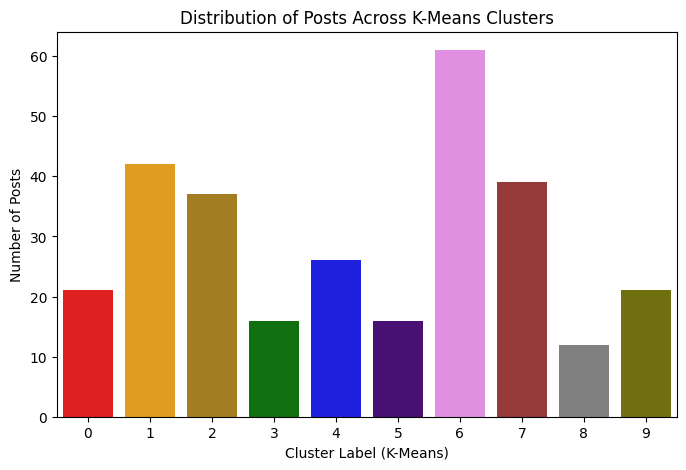


Generating bar charts for most common tags per cluster in subplots...


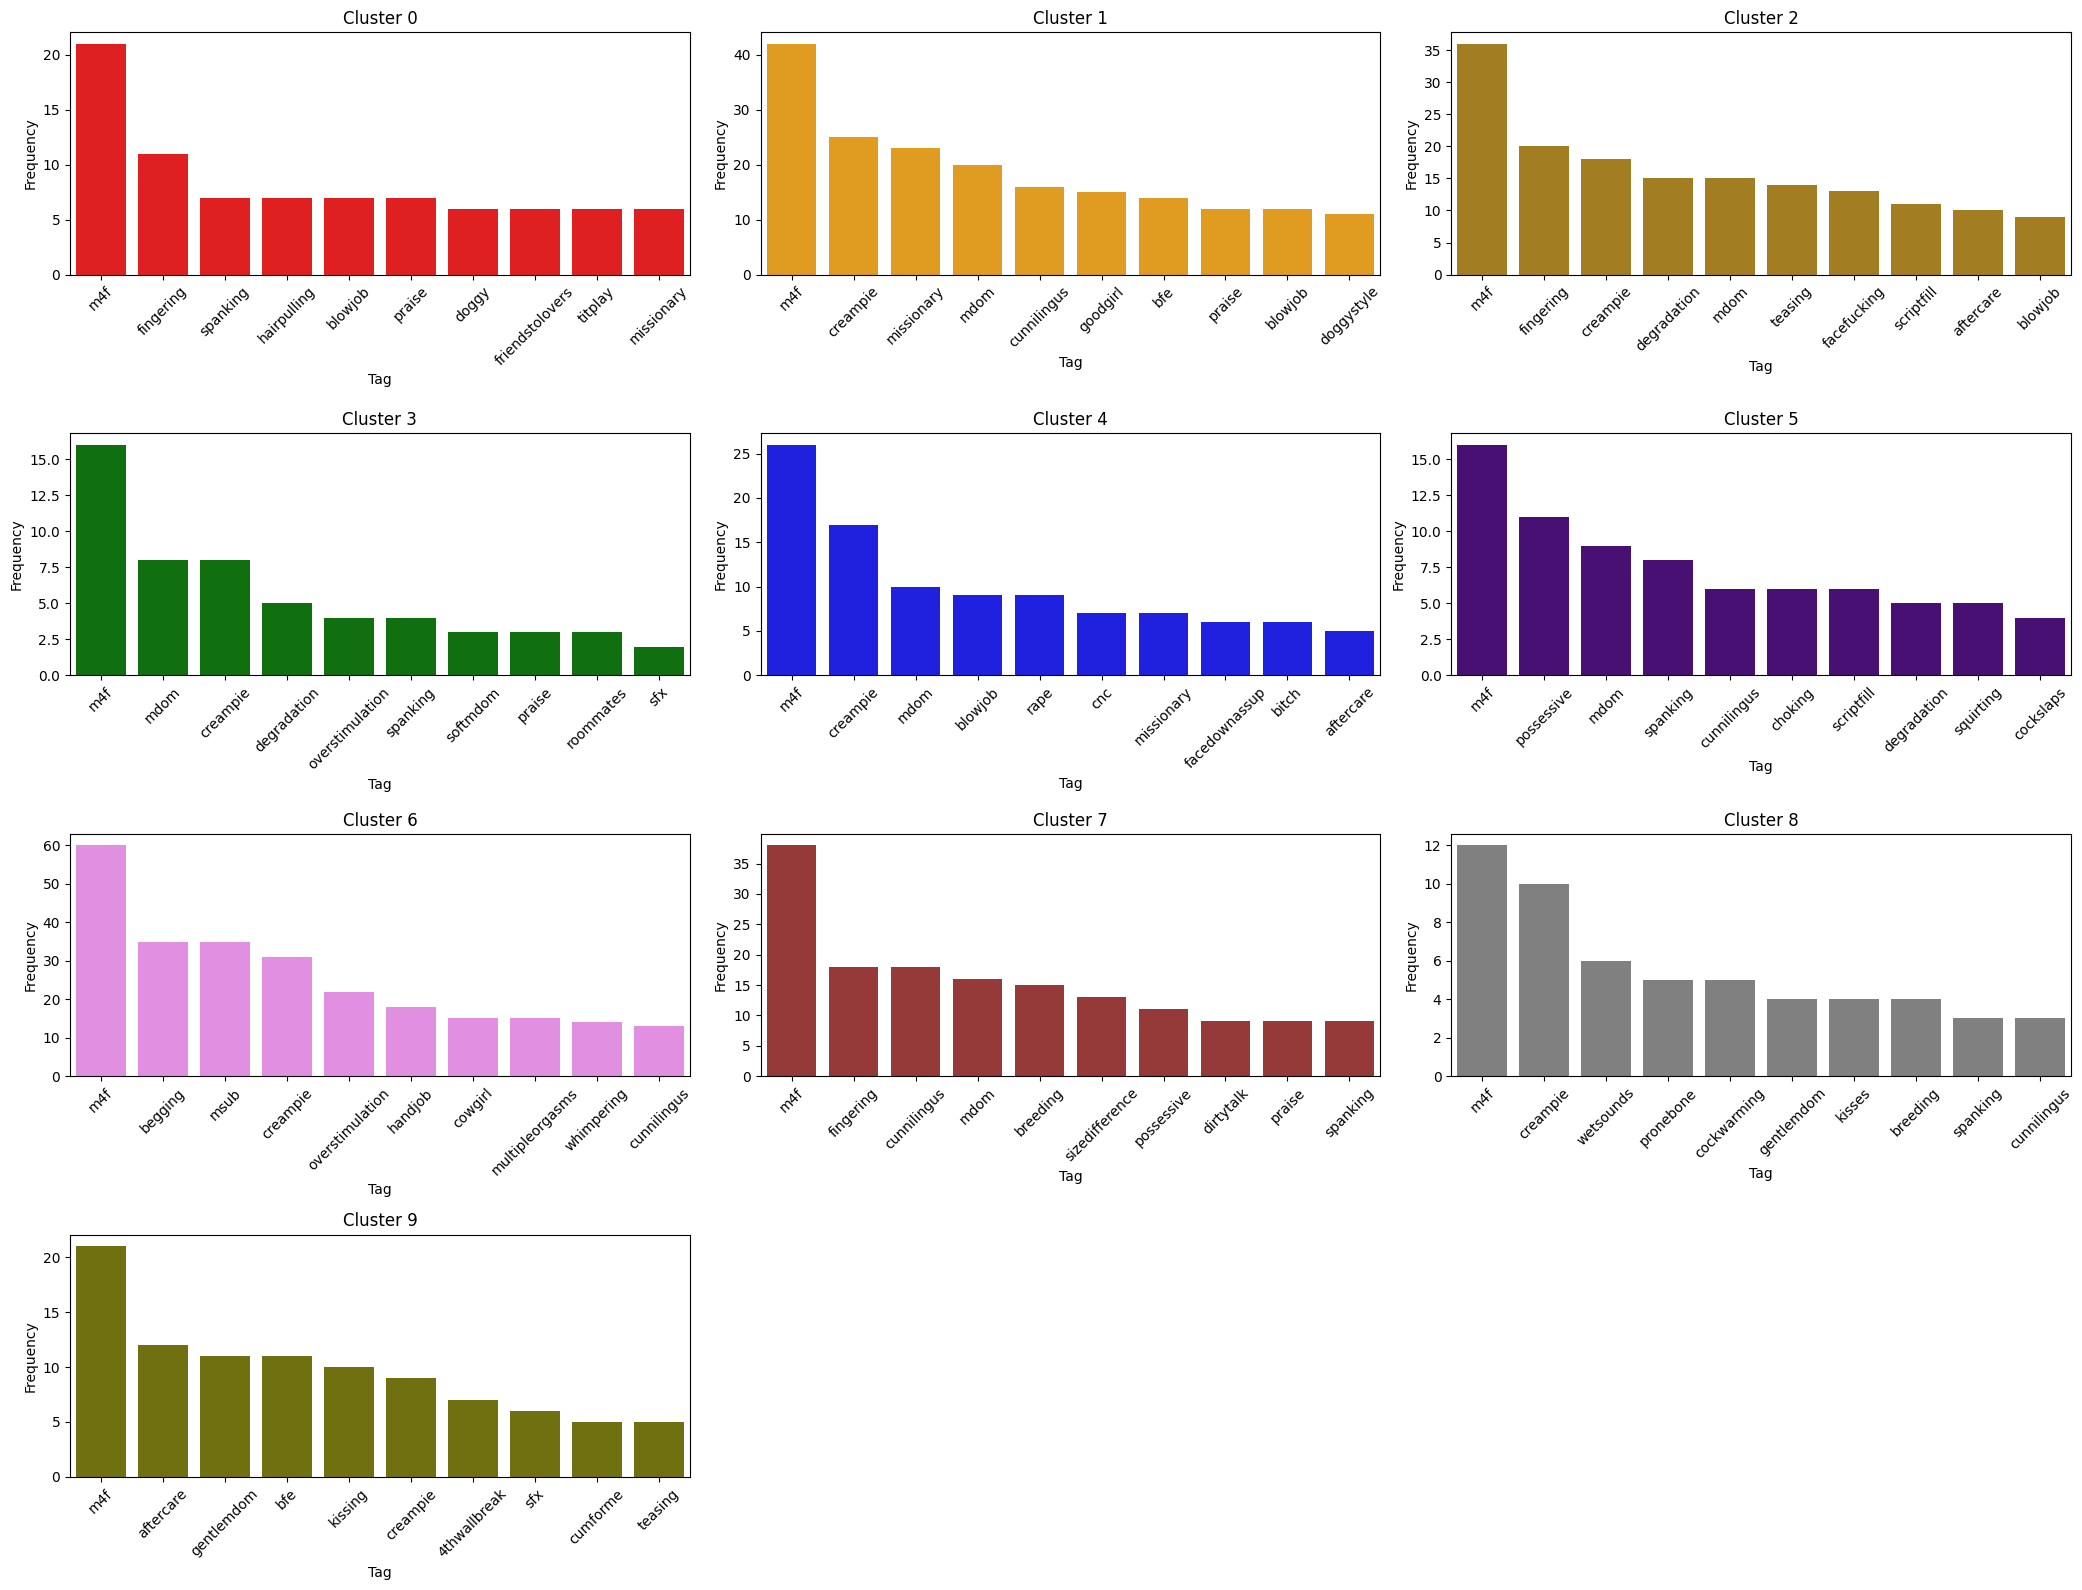

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import math

# Ensure df_final exists and has 'tag_cluster_label_kmeans' and 'tags_standardized' columns
if 'df_final' in locals() and isinstance(df_final, pd.DataFrame) and all(col in df_final.columns for col in ['tag_cluster_label_kmeans', 'tags_standardized']):

    # Define rainbow colors (7 colors)
    rainbow_colors = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet']

    # Create a color map for all 10 clusters
    # Use rainbow colors for the first 7, and then extend with other distinct colors
    cluster_colors = rainbow_colors + ['brown', 'gray', 'olive'] # Adding 3 more distinct colors for 10 clusters

    # --- Modify color for Cluster 2 (index 2) ---
    cluster_colors[2] = 'darkgoldenrod' # Changed yellow to dark goldenrod


    # --- Bar Chart: Distribution of Posts Across Clusters ---
    print("Generating bar chart for distribution of posts across clusters...")

    plt.figure(figsize=(8, 5)) # Adjusted figsize
    cluster_counts = df_final['tag_cluster_label_kmeans'].value_counts().sort_index()

    # Map cluster labels to colors
    colors_for_plot = [cluster_colors[i] for i in cluster_counts.index]

    sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette=colors_for_plot)
    plt.title('Distribution of Posts Across K-Means Clusters')
    plt.xlabel('Cluster Label (K-Means)')
    plt.ylabel('Number of Posts')
    plt.xticks(rotation=0) # Keep x-axis labels horizontal
    plt.show()

    # --- Bar Charts: Frequency of Most Common Tags per Cluster (in subplots) ---
    print("\nGenerating bar charts for most common tags per cluster in subplots...")

    grouped_by_cluster = df_final.groupby('tag_cluster_label_kmeans')
    top_n = 10 # Number of top tags to display per cluster
    n_clusters = len(grouped_by_cluster) # Get the actual number of clusters

    # Determine the number of rows and columns for subplots
    n_cols = 3
    n_rows = math.ceil(n_clusters / n_cols)

    # Create the figure and subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 7, n_rows * 4)) # Adjust overall figure size
    axes = axes.flatten() # Flatten the 2D array of axes for easier iteration

    for i, (cluster_label, cluster_data) in enumerate(grouped_by_cluster):
        all_tags_in_cluster = [tag for tags_list in cluster_data['tags_standardized'] for tag in tags_list]
        tag_counts = Counter(all_tags_in_cluster)
        most_common_tags = tag_counts.most_common(top_n)

        ax = axes[i] # Get the current axis for the subplot

        if most_common_tags:
            tags, counts = zip(*most_common_tags)

            # Use the assigned color for this cluster
            color_for_cluster = cluster_colors[cluster_label]
            sns.barplot(x=list(tags), y=list(counts), color=color_for_cluster, ax=ax) # Pass the axis to sns.barplot

            ax.set_title(f'Cluster {cluster_label}') # Set title for the subplot
            ax.set_xlabel('Tag')
            ax.set_ylabel('Frequency')
            ax.tick_params(axis='x', rotation=45) # Removed invalid ha parameter
        else:
            ax.set_title(f'Cluster {cluster_label}')
            ax.text(0.5, 0.5, "No tags", horizontalalignment='center', verticalalignment='center', transform=ax.transAxes) # Add text if no tags

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout() # Adjust layout to prevent labels overlapping
    plt.show()

else:
    print("DataFrame 'df_final' not found or missing required columns. Please ensure previous steps were successful.")

It seems like [M4F] is an overwhelmingly common tag for all of the clusters. Now that we acknowledged this feature, we can remove it when visualizing. We will create a "word cloud" for each color, removing [M4F].

Generating word clouds for each cluster (excluding 'm4f')...


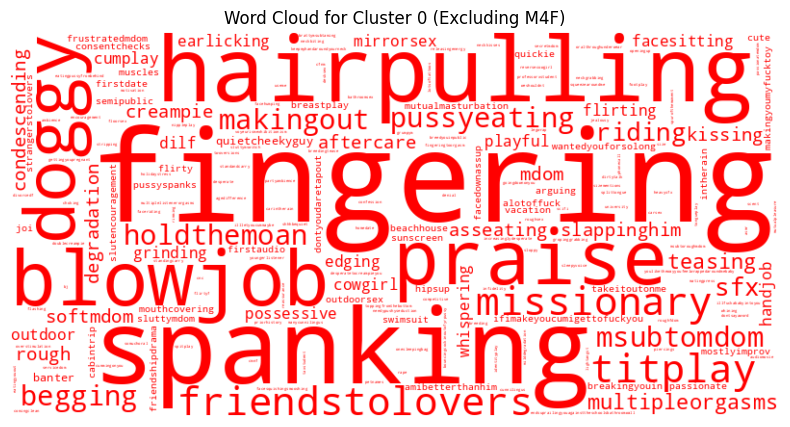

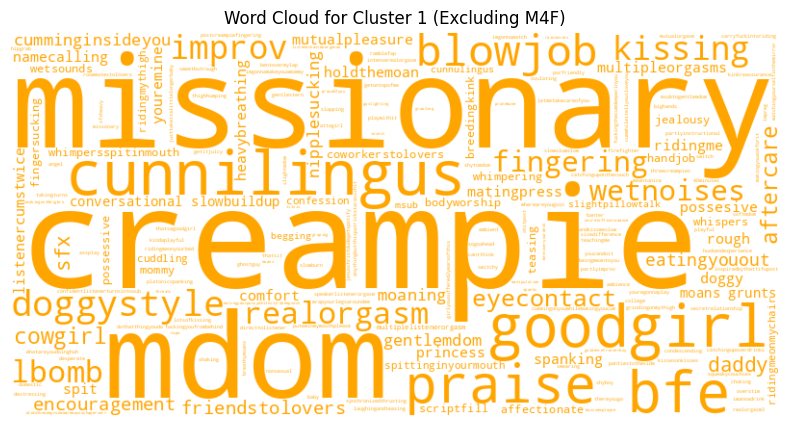

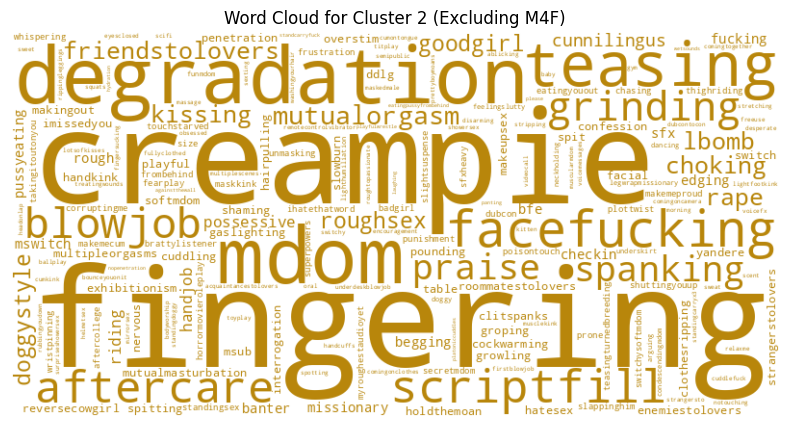

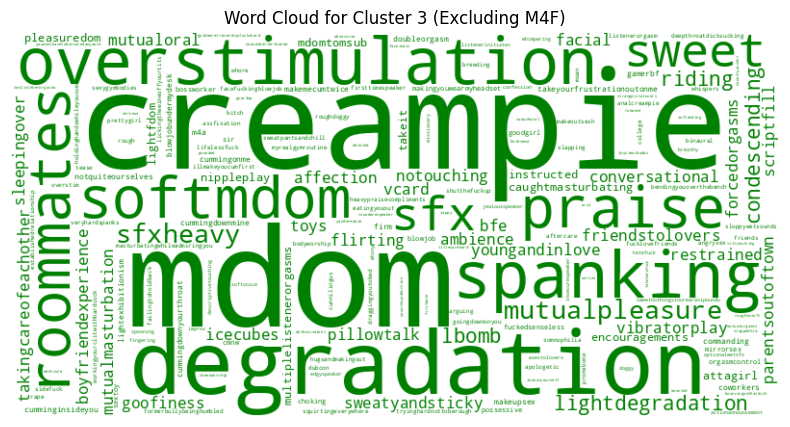

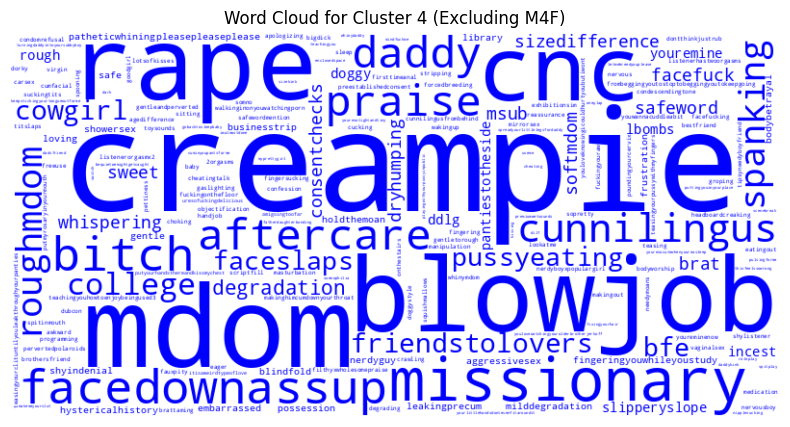

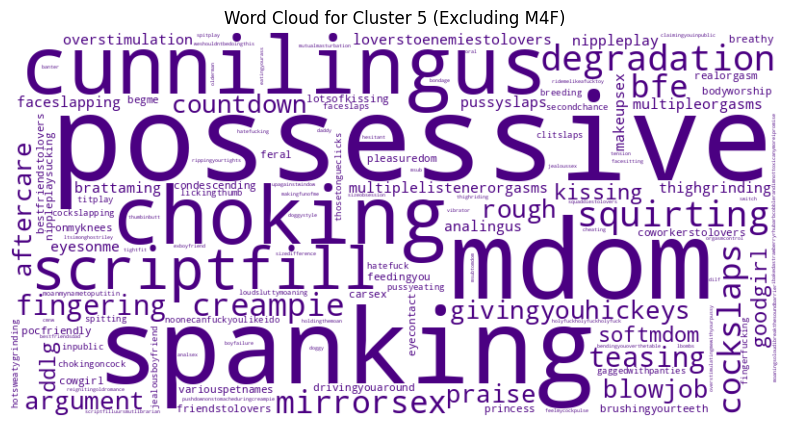

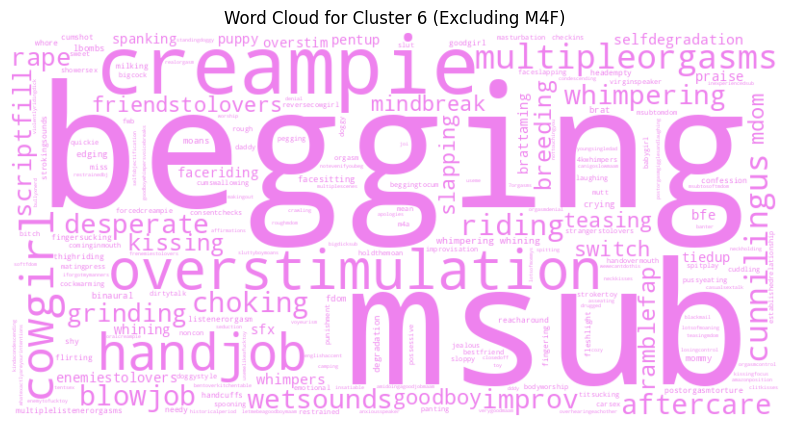

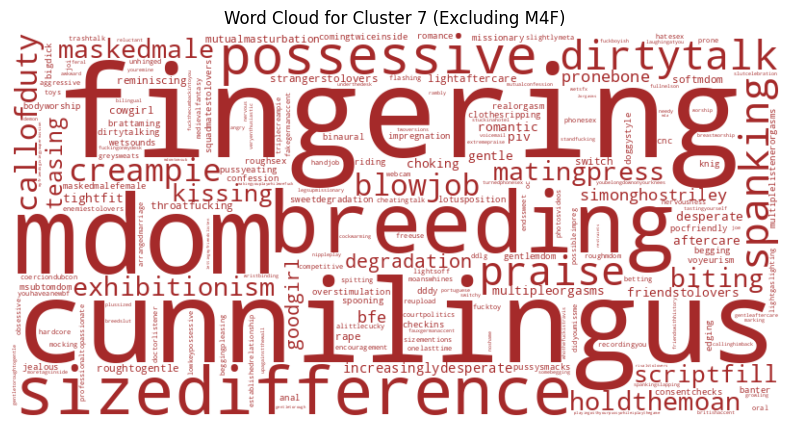

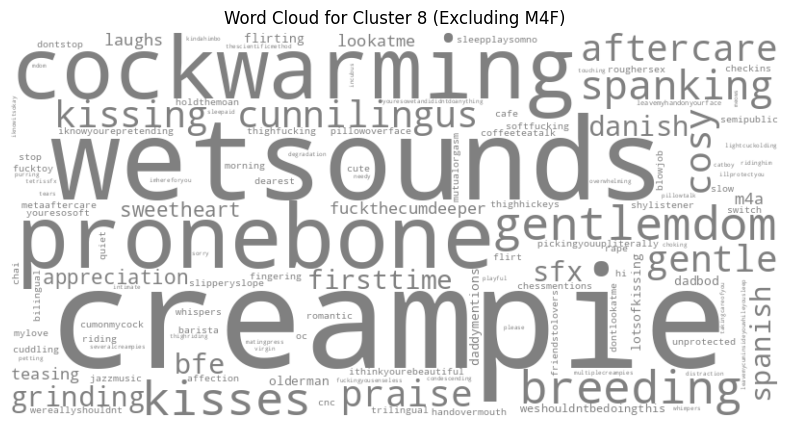

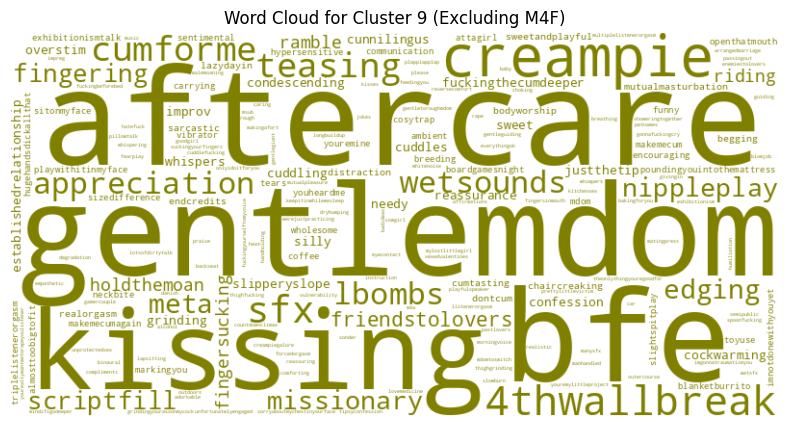

In [38]:
# If you don't have the wordcloud library installed, uncomment and run the line below:
# !pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd

# Ensure df_final exists and has 'tag_cluster_label_kmeans' and 'tags_standardized' columns
if 'df_final' in locals() and isinstance(df_final, pd.DataFrame) and all(col in df_final.columns for col in ['tag_cluster_label_kmeans', 'tags_standardized']):

    # Define the same color map used for the bar charts
    rainbow_colors = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet']
    cluster_colors = rainbow_colors + ['brown', 'gray', 'olive'] # Adding 3 more distinct colors for 10 clusters

    # --- Modify color for Cluster 2 (index 2) ---
    cluster_colors[2] = 'darkgoldenrod' # Changed yellow to dark goldenrod


    print("Generating word clouds for each cluster (excluding 'm4f')...")

    grouped_by_cluster = df_final.groupby('tag_cluster_label_kmeans')

    for cluster_label, cluster_data in grouped_by_cluster:
        # Flatten the list of lists of tags for the current cluster
        all_tags_in_cluster = [tag for tags_list in cluster_data['tags_standardized'] for tag in tags_list]

        # Filter out the 'm4f' tag
        filtered_tags = [tag for tag in all_tags_in_cluster if tag != 'm4f']

        if filtered_tags:
            # Combine the filtered tags into a single string, space-separated
            text = " ".join(filtered_tags)

            # Use the assigned color for this cluster for the word cloud
            # We can use a colormap or a single color. Using a single color for simplicity here.
            color_for_cluster = cluster_colors[cluster_label]

            # Generate the word cloud
            wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text) # colormap='viridis' is a placeholder, we'll color manually

            # Create a colored word cloud
            def color_func(word, **kwargs):
                return color_for_cluster

            wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)


            # Display the word cloud
            plt.figure(figsize=(10, 5))
            plt.imshow(wordcloud.recolor(color_func=color_func), interpolation='bilinear')
            plt.axis("off") # Hide axes
            plt.title(f'Word Cloud for Cluster {cluster_label} (Excluding M4F)')
            plt.show()
        else:
            print(f"No tags (excluding 'm4f') found in Cluster {cluster_label} to generate a word cloud.")

else:
    print("DataFrame 'df_final' not found or missing required columns. Please ensure previous steps were successful.")

## Phase 3: Correlate Tags and Engagement

Analyzing the engagement metrics for each cluster.

Calculating Median and Variance of Score per Cluster...

Median and Variance of Upvote Count (Score) per Cluster:


,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,Cluster 8,Cluster 9
Median Score,5.442000e+03,3.493000e+03,3.461000e+03,3105.000000,3.206500e+03,3.346500e+03,2.995000e+03,3.861000e+03,3.047500e+03,3.374000e+03
Variance Score,1.198660e+07,5.578615e+06,9.295299e+06,865641.795833,2.837045e+06,1.179623e+06,3.372625e+06,4.716980e+06,1.643099e+06,1.403145e+06



Calculating Rank of Median and Variance per Cluster...

Rank of Median and Variance of Upvote Count (Score) per Cluster:


,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,Cluster 8,Cluster 9
Median Score Rank,1,3,4,8,7,6,10,2,9,5
Variance Score Rank,1,3,2,10,6,9,5,4,7,8



Generating bar chart for Variance Score per Cluster...


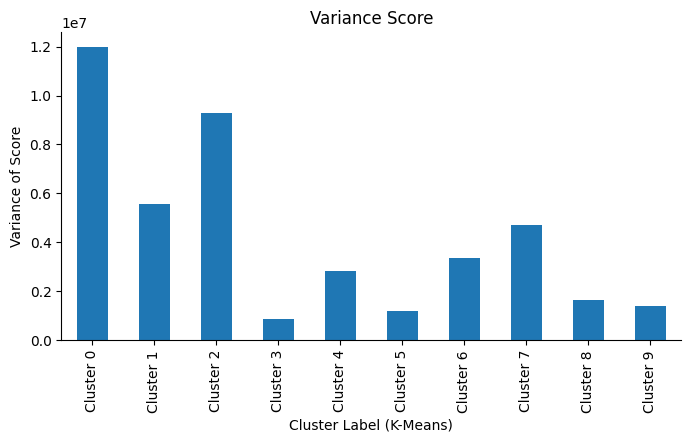

In [39]:
import pandas as pd
import matplotlib.pyplot as plt # Import matplotlib for plotting

# Ensure df_final exists and has 'tag_cluster_label_kmeans' and 'score' columns
if 'df_final' in locals() and isinstance(df_final, pd.DataFrame) and all(col in df_final.columns for col in ['tag_cluster_label_kmeans', 'score']):

    print("Calculating Median and Variance of Score per Cluster...")

    # Group by the K-Means cluster label
    grouped_by_cluster = df_final.groupby('tag_cluster_label_kmeans')['score']

    # Calculate median and variance for each cluster
    median_scores = grouped_by_cluster.median()
    variance_scores = grouped_by_cluster.var()

    # Combine the statistics into a DataFrame for a table format
    score_summary_table = pd.DataFrame({
        'Median Score': median_scores,
        'Variance Score': variance_scores
    }).T # Transpose to have stats as rows and clusters as columns

    # Rename columns to represent clusters
    score_summary_table.columns = [f'Cluster {c}' for c in score_summary_table.columns]


    print("\nMedian and Variance of Upvote Count (Score) per Cluster:")
    display(score_summary_table)

    # --- Generate Table of Ranks ---
    print("\nCalculating Rank of Median and Variance per Cluster...")

    # Calculate ranks for Median Score and Variance Score
    # Use .rank(ascending=False) to rank from highest (1) to lowest
    median_rank = score_summary_table.loc['Median Score'].rank(ascending=False)
    variance_rank = score_summary_table.loc['Variance Score'].rank(ascending=False)

    # Combine ranks into a new DataFrame
    rank_table = pd.DataFrame({
        'Median Score Rank': median_rank,
        'Variance Score Rank': variance_rank
    }).T # Transpose to have ranks as rows and clusters as columns

    # Convert rank values to integers
    rank_table = rank_table.astype(int)


     # The columns (clusters) are already named correctly from score_summary_table

    print("\nRank of Median and Variance of Upvote Count (Score) per Cluster:")
    display(rank_table)


    # Plot the Variance Score
    print("\nGenerating bar chart for Variance Score per Cluster...")
    # Access the correct column name 'Variance Score'
    score_summary_table.loc['Variance Score'].plot(kind='bar', figsize=(8, 4), title='Variance Score')
    plt.xlabel('Cluster Label (K-Means)') # Add xlabel for clarity
    plt.ylabel('Variance of Score') # Add ylabel for clarity
    plt.gca().spines[['top', 'right']].set_visible(False)
    plt.show() # Show the plot

else:
    print("DataFrame 'df_final' not found or missing required columns. Please ensure previous steps were successful.")

Generating a combined box plot for Upvote Count (Score) across all clusters...


/tmp/ipython-input-110715740.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='tag_cluster_label_kmeans', y='score', data=df_final, palette=[cluster_colors[i] for i in sorted(df_final['tag_cluster_label_kmeans'].unique())])


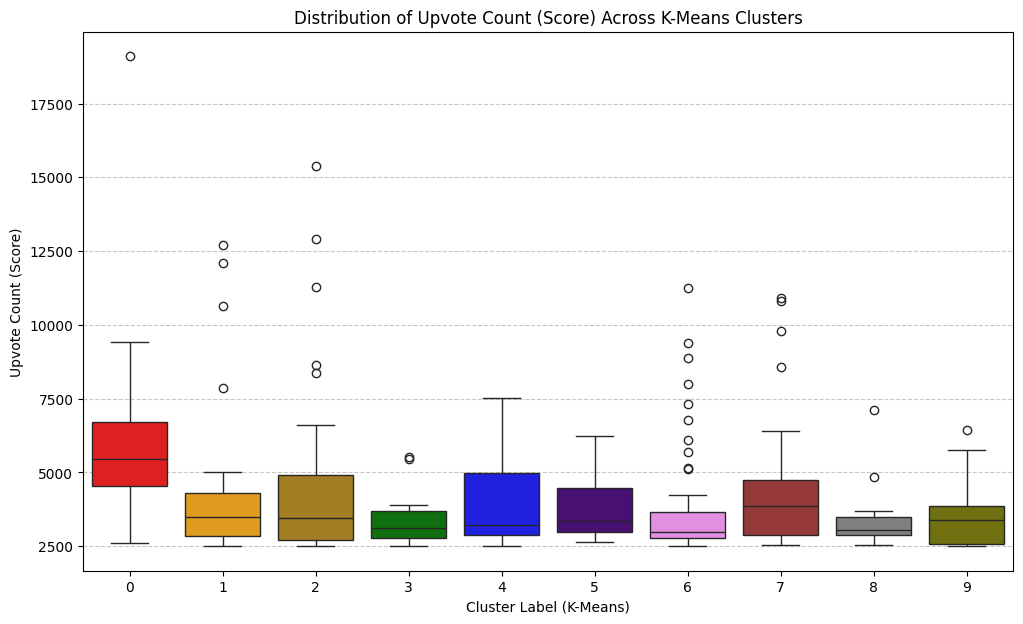

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Ensure df_final exists and has 'tag_cluster_label_kmeans', 'score' and the cluster_colors list
if 'df_final' in locals() and isinstance(df_final, pd.DataFrame) and 'tag_cluster_label_kmeans' in df_final.columns and 'score' in df_final.columns and 'cluster_colors' in locals():

    print("Generating a combined box plot for Upvote Count (Score) across all clusters...")

    plt.figure(figsize=(12, 7)) # Adjust figure size as needed for a wider plot
    # Use seaborn.boxplot with cluster label on x-axis and score on y-axis
    # Use the cluster_colors list to color the boxes
    sns.boxplot(x='tag_cluster_label_kmeans', y='score', data=df_final, palette=[cluster_colors[i] for i in sorted(df_final['tag_cluster_label_kmeans'].unique())])

    plt.title('Distribution of Upvote Count (Score) Across K-Means Clusters')
    plt.xlabel('Cluster Label (K-Means)')
    plt.ylabel('Upvote Count (Score)')
    plt.xticks(rotation=0) # Keep x-axis labels horizontal
    plt.grid(axis='y', linestyle='--', alpha=0.7) # Add a horizontal grid for easier comparison
    plt.show()

else:
    print("DataFrame 'df_final', 'score' column, or 'cluster_colors' not found. Please ensure previous steps were successful.")

# Now let's try to find some insights.

## The Safe bet: Gentle & Sensual

- ### Group 0 has the highest median upvote score with 4th highest variance. It also has the 6th highest posts count.
- ### The most common tags of Group 0 that **aren't also popular in other groups** are:
  `praise (6)`
`missionary (5)`
`makingout (5)`
`friendstolovers (5)`

These tags characterize a **gentle**, **sensual** and perhaps **vanilla**-style sexual dynamic.

By specializing in this genre, not only could the creator achieve the **highest popularity**, but he will also achieve it relatively **consistently** (as suggested by the top median and relatively fewer outliers in the data).

Group 4 shows a similar pattern. Its tags suggest a sensual, serving style (`aftercare` `gentledom` `lbomb` `sfx`), with a consisntently high upvote socore (3rd place in median and 6th place in variance)

The lower posts count (15, 25) suggests such style is **undervalued** and **underrated** by most male performers. That demonstrates good oppurtunities for newcomers.


## High-Stakes, High Return: Rough Dom

- ### Group 7 has the highest posts count, highest maximum upvote score, but also the highest variance.
- ### In the box plot, Group 7 has the most amount of outliers, significantly skewing the data toward the right.
- ### Its mean upvotes isn't at all impressive, falling at No.6.
- ### The common tags of Group 7 are perhaps the most distinctive. Examples (The last two are not among the common tags of any other group.):
  `mdom` `degradation` `possesive` `creampie` `choking` `spanking`.


This group is about rough, **dominant**, and **hard-core** style sexual characters.

It offers the **highest potential**, possibly due to the unique need for a specific subset of niche audiences.

However, it's highly **dependent on the individual** performer's capablities or unique strengths.

The Group demonstrates a "Winner take all" landscape of **fierce competion**, as evidenced by its low median, largest size and extremely highest outliers.

Group 2 demonstrate a similar pattern of high potental but high variance with common tags like `degradation` `facefucking` `teasing` `mdom`, except that it has high variance as well. However, we won't delve into its details as it has less statistical power and practicial significance, due to its smaller size.


## Suboptimal for Popularity: Male Submissive

*   **Size and Engagement:** A large cluster (54 posts), ranking 9th in median score but 3rd in variance. The low median score combined with high variance suggests a mixed bag – while some posts in this category might perform well, many likely have lower engagement, and there are significant outliers (potentially very successful submissive posts).
*   **Key Tags:** Heavily features `msub`, `begging`, `creampie`, `overstimulation`, and `handjob`.
*   **Interpretation:** This is the primary cluster for male submissive content. The high post count indicates it's a popular theme for creators. However, the low median score suggests that achieving high engagement as a male submissive performer might be challenging or highly dependent on specific content or performer appeal, leading to unsatisfactory outcomes. These guys are most likely exploring their own kinks and desires rather than producing audience facing content

# Conclusion and Actionable Insights for a New 20M Male Performer

Based on the analysis of male-performed posts on r/gonewildaudio, here are some actionable insights and recommendations for a new 20M creator looking to enter this space:

1.  **Consider the "Safe Bet" (Gentle & Sensual Themes):** Styles like the **Gentle Boyfriend/Partner (Cluster 0)** and the **Sensory-Focused Lover (Cluster 4)** are underrated. They show high median engagement with relatively lower variance. These themes, focusing on gentle dominance, intimacy, sensuality, and listener experience, appear to offer a good balance of popularity and consistency. For a new creator, starting here might provide a more stable path to building an audience and receiving positive feedback compared to highly competitive or niche areas.
    *   **Action:** Focus on creating content with tags like `gentlemdom`, `aftercare`, `kissing`, `bfe`, `cunnilingus`, `wetsounds`, `teasing`, and `begging`. Emphasize intimacy, emotional connection, and sensory details.

2.  **Understand the "High-Stakes, High-Return" (Rough Dominance):** The **Stern Dominant (Cluster 7)** and **Intense or Experimental Dominant (Cluster 2)** clusters show the highest post counts and potential for very high engagement (outliers), but also significant variance. This indicates a competitive landscape where success might depend heavily on unique appeal or execution within this niche.
    *   **Action:** If you are drawn to dominant themes, be aware that while the ceiling for engagement is high, so is the variability. Consider starting with less intense forms of dominance or focusing on unique angles within this space. Tags like `mdom`, `spanking`, `degradation`, and `choking` are common here, but success is not guaranteed.

3.  **Be Cautious with "Male Submissive" Content:** While the **Male Submissive (Cluster 6)** is a large cluster, it has a significantly lower median score and high variance. This suggests that while many creators produce this content, achieving widespread popularity might be challenging, and outcomes vary greatly. It may be more driven by creator interest than broad audience demand for male subperformed content.
    *   **Action:** If exploring male submissive themes, understand that achieving high engagement could be more difficult.

Finally, it's important to understand that these differneces are relative. **All** of the posts in the anaysis are successful, as they're from the Top 3000 best-performing posts of r/gonewildaudio, with a minimum upvote score of 2500. The point of this report is to inform and **optimize** the exploration for a male creator with 0 career captial in this niche.

The landscape is always changing. Continuously analyze the engagement your posts receive and observe trends in the subreddit to refine your content and tagging strategies. After posting, track the performance of your content. See which tags and themes resonate most with the audience and be willing to experiment and adapt based on feedback and engagement data.

In [41]:
# Ensure df_final exists and has the required columns
if 'df_final' in locals() and isinstance(df_final, pd.DataFrame) and all(col in df_final.columns for col in ['tag_cluster_label_kmeans', 'score', 'url']):

    # Filter for posts in Cluster 0
    cluster_0_posts = df_final[df_final['tag_cluster_label_kmeans'] == 0]

    # Rank the posts by upvote score in descending order
    ranked_cluster_0_posts = cluster_0_posts.sort_values(by='score', ascending=False)

    # Add the introductory remark
    print("As a closing remark/comment/action, here are the posts from Cluster 0, ranked by upvote score, to help you get started:")
    print("-" * 60) # Optional: Add a separator line

    # Output the complete links
    if not ranked_cluster_0_posts.empty:
        for index, row in ranked_cluster_0_posts.iterrows():
            print(row['url'])
    else:
        print("No posts found in Cluster 0.")

else:
    print("DataFrame 'df_final' not found or missing required columns. Please ensure previous steps were successful.")

As a closing remark/comment/action, here are the posts from Cluster 0, ranked by upvote score, to help you get started:
------------------------------------------------------------
https://www.reddit.com/r/gonewildaudio/comments/mislkr/m4f_fucked_by_your_best_friends_younger_brother/
https://www.reddit.com/r/gonewildaudio/comments/14j0o82/m4f_your_exs_friend_helps_you_get_over_him_on/
https://www.reddit.com/r/gonewildaudio/comments/1bokmpb/m4f_having_friendship_breakup_sex_during_a/
https://www.reddit.com/r/gonewildaudio/comments/m1g9le/m4f_watching_a_sex_scene_with_your_friend_goes/
https://www.reddit.com/r/gonewildaudio/comments/13xtcor/m4f_the_cute_barista_is_actually_a_hard_dom_mdom/
https://www.reddit.com/r/gonewildaudio/comments/1eh2b0h/m4f_taking_a_chance_with_the_flirty_stranger_at/
https://www.reddit.com/r/gonewildaudio/comments/vki63b/m4f_your_submissive_bf_wanted_to_try_something/
https://www.reddit.com/r/gonewildaudio/comments/1dn1iqp/m4f_teasing_your_friend_who_hates_hikin